In [1]:
from __future__ import print_function
from __future__ import division

%matplotlib inline
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [2]:
# load the provided data
train_features = pd.read_csv('./dengue_features_train.csv',
                             index_col=[0,1,2])

train_labels = pd.read_csv('./dengue_labels_train.csv',
                           index_col=[0,1,2])
features = ['reanalysis_specific_humidity_g_per_kg', 
                 'reanalysis_dew_point_temp_k', 
                 'station_avg_temp_c', 
                 'station_min_temp_c',
               'ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw' ]
train_features = train_features[features]

In [3]:
# Seperate data for San Juan
sj_train_features = train_features.loc['sj']
sj_train_labels = train_labels.loc['sj']

# Separate data for Iquitos
iq_train_features = train_features.loc['iq']
iq_train_labels = train_labels.loc['iq']

In [4]:
print('San Juan')
print('features: ', sj_train_features.shape)
print('labels  : ', sj_train_labels.shape)

print('\nIquitos')
print('features: ', iq_train_features.shape)
print('labels  : ', iq_train_labels.shape)

San Juan
features:  (936, 8)
labels  :  (936, 1)

Iquitos
features:  (520, 8)
labels  :  (520, 1)


In [13]:
sj_train_features.head()

reanalysis_specific_humidity_g_per_kg  \
year weekofyear                                          
1990 18                                      14.012857   
     19                                      15.372857   
     20                                      16.848571   
     21                                      16.672857   
     22                                      17.210000   

                 reanalysis_dew_point_temp_k  station_avg_temp_c  \
year weekofyear                                                    
1990 18                           292.414286           25.442857   
     19                           293.951429           26.714286   
     20                           295.434286           26.714286   
     21                           295.310000           27.471429   
     22                           295.821429           28.942857   

                 station_min_temp_c   ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  
year weekofyear                                                              
1990 18                        20.0  0.122600  0.103725  0.198483  0.177617  
     19                        22.2  0.169900  0.142175  0.162357  0.155486  
     20                        22.8  0.032250  0.172967  0.157200  0.170843  
     21                        23.3  0.128633  0.245067  0.227557  0.235886  
     22                        23.9  0.196200  0.262200  0.251200  0.247340

In [11]:
sj_train_labels.head()

total_cases
year weekofyear             
1990 18                    4
     19                    5
     20                    4
     21                    3
     22                    6

In [12]:
# Remove `week_start_date` string. No need for time based features in baseline model
sj_train_features.drop('week_start_date', axis=1, inplace=True)
iq_train_features.drop('week_start_date', axis=1, inplace=True)

KeyError: "['week_start_date'] not found in axis"

In [27]:
# Null check
pd.isnull(sj_train_features).any()

ndvi_ne                                  True
ndvi_nw                                  True
ndvi_se                                  True
ndvi_sw                                  True
precipitation_amt_mm                     True
reanalysis_air_temp_k                    True
reanalysis_avg_temp_k                    True
reanalysis_dew_point_temp_k              True
reanalysis_max_air_temp_k                True
reanalysis_min_air_temp_k                True
reanalysis_precip_amt_kg_per_m2          True
reanalysis_relative_humidity_percent     True
reanalysis_sat_precip_amt_mm             True
reanalysis_specific_humidity_g_per_kg    True
reanalysis_tdtr_k                        True
station_avg_temp_c                       True
station_diur_temp_rng_c                  True
station_max_temp_c                       True
station_min_temp_c                       True
station_precip_mm                        True
dtype: bool

Text(0.5, 0, 'Time')

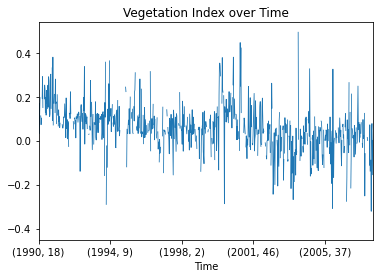

In [28]:
(sj_train_features
     .ndvi_ne
     .plot
     .line(lw=0.8))

plt.title('Vegetation Index over Time')
plt.xlabel('Time')

In [29]:
# fill nan with most recent value  could research and improve
sj_train_features.fillna(method='ffill', inplace=True)
iq_train_features.fillna(method='ffill', inplace=True)

/Applications/anaconda3/envs/py3/lib/python3.7/site-packages/pandas/core/frame.py:4244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs


In [30]:
# distribution of labels suggests Negative Binomial Regression
print('San Juan')
print('mean: ', sj_train_labels.mean()[0])
print('var :', sj_train_labels.var()[0])

print('\nIquitos')
print('mean: ', iq_train_labels.mean()[0])
print('var :', iq_train_labels.var()[0])

San Juan
mean:  34.18055555555556
var : 2640.045439691045

Iquitos
mean:  7.565384615384615
var : 115.8955239365642


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11d777ad0>]],
      dtype=object)

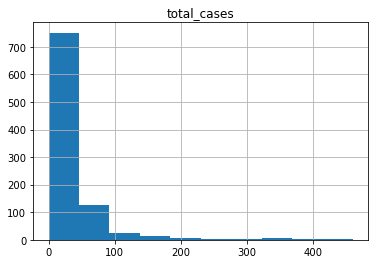

In [31]:
sj_train_labels.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11d77bed0>]],
      dtype=object)

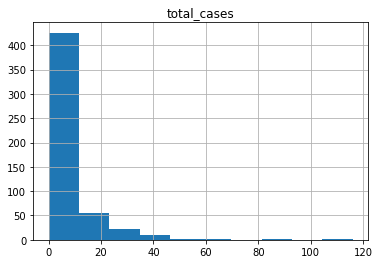

In [32]:
iq_train_labels.hist()

In [33]:
# Feature Selection from Correlation

In [34]:
sj_train_features['total_cases'] = sj_train_labels.total_cases
iq_train_features['total_cases'] = iq_train_labels.total_cases

/Applications/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Applications/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0, 0.5, 'Number of Cases')

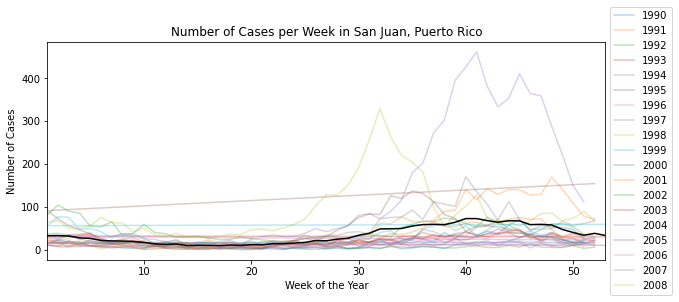

In [35]:
y_train_labels = pd.read_csv('./dengue_labels_train.csv',index_col=[0])
y_train_sj = y_train_labels.loc['sj']
for i in set(y_train_sj['year']):
    df = y_train_sj[y_train_sj['year'] == i]
    df.set_index('weekofyear', drop = True, inplace = True)
    plt.plot(df['total_cases'], alpha = .3)
    
y_train_sj.groupby('weekofyear')['total_cases'].mean().plot(c = 'k', figsize = (10,4))
plt.legend(set(y_train_sj['year']), loc='center left', bbox_to_anchor=(1, .5))

plt.title('Number of Cases per Week in San Juan, Puerto Rico')
plt.xlabel('Week of the Year')
plt.ylabel('Number of Cases')

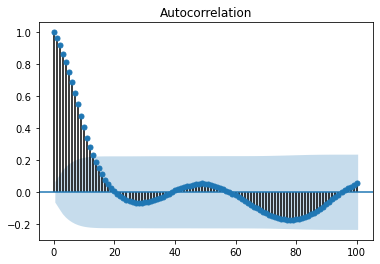

In [5]:
from statsmodels.graphics import tsaplots
fig = tsaplots.plot_acf(sj_train_labels['total_cases'],lags = 100)


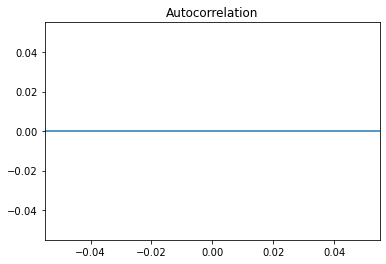

In [7]:
fig = tsaplots.plot_acf(sj_train_features['reanalysis_specific_humidity_g_per_kg'],lags=100)   

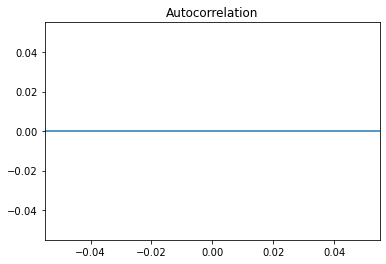

In [8]:
fig = tsaplots.plot_acf(sj_train_features['reanalysis_dew_point_temp_k'],lags=100)   


In [37]:
# compute the correlations
sj_correlations = sj_train_features.corr()
iq_correlations = iq_train_features.corr()

Text(0.5, 1.0, 'San Juan Variable Correlations')

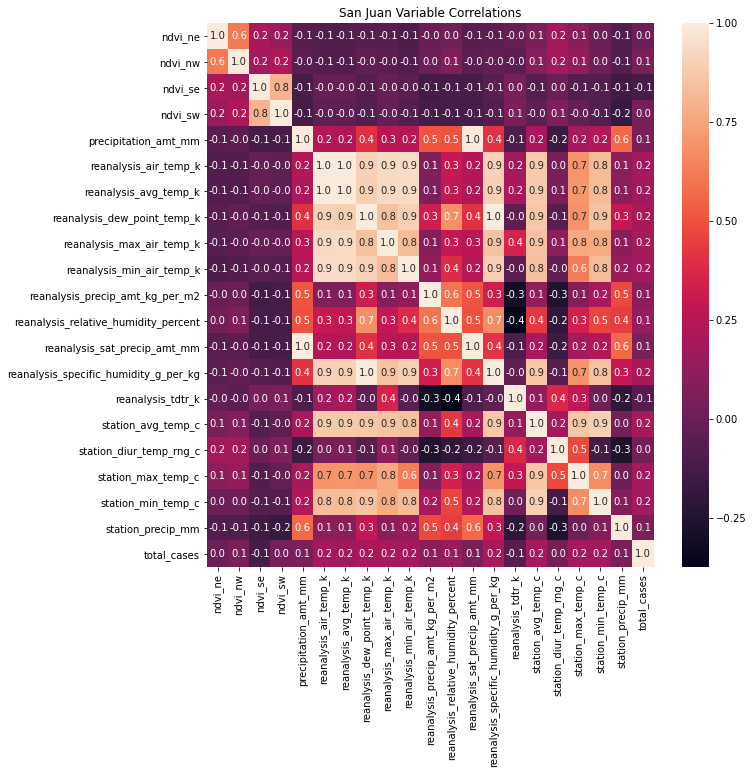

In [38]:
# Plot San Juan
fig, ax = plt.subplots(figsize=(10,10))
sj_corr_heat = sns.heatmap(sj_correlations,annot=True,ax=ax,fmt='.1f')
plt.title('San Juan Variable Correlations')

Text(0.5, 1.0, 'Iquitos Variable Correlations')

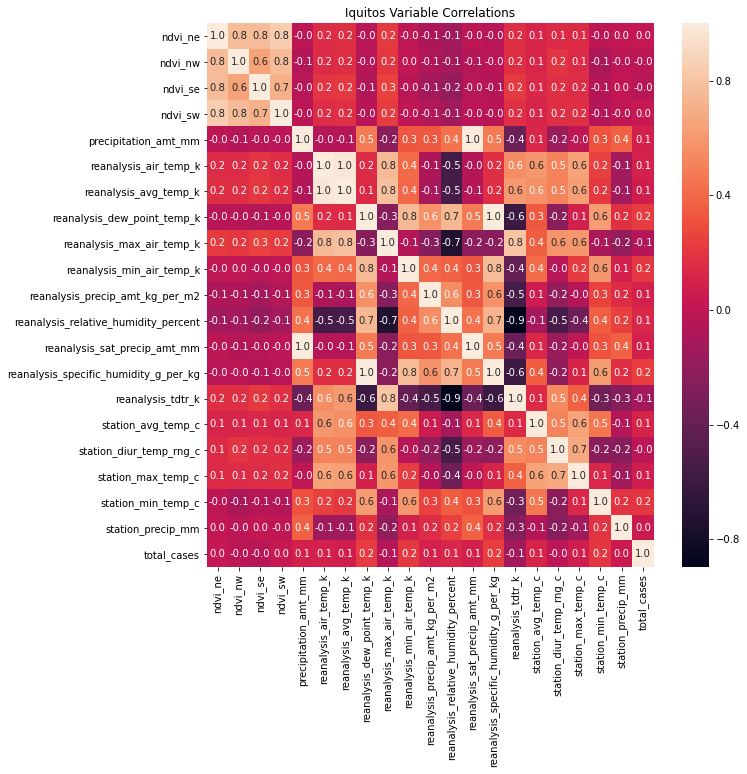

In [39]:
# Plot iquitos
fig, ax = plt.subplots(figsize=(10,10))
iq_corr_heat = sns.heatmap(iq_correlations,annot=True,ax=ax,fmt='.1f')
plt.title('Iquitos Variable Correlations')

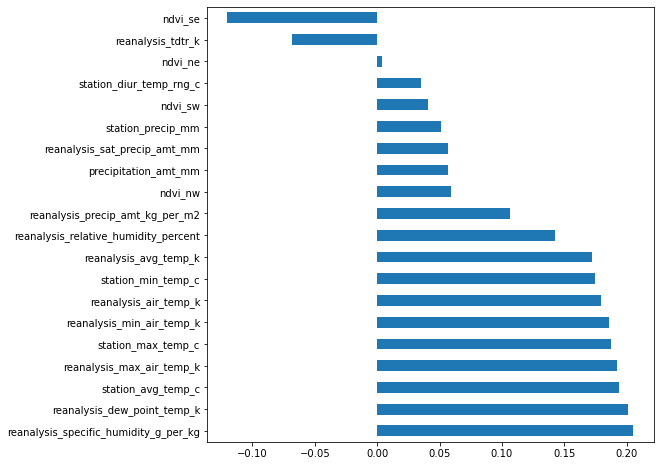

In [40]:
# San Juan
(sj_correlations
     .total_cases
     .drop('total_cases') # don't compare with myself
     .sort_values(ascending=False)
     .plot
     .barh(figsize = (8,8)))

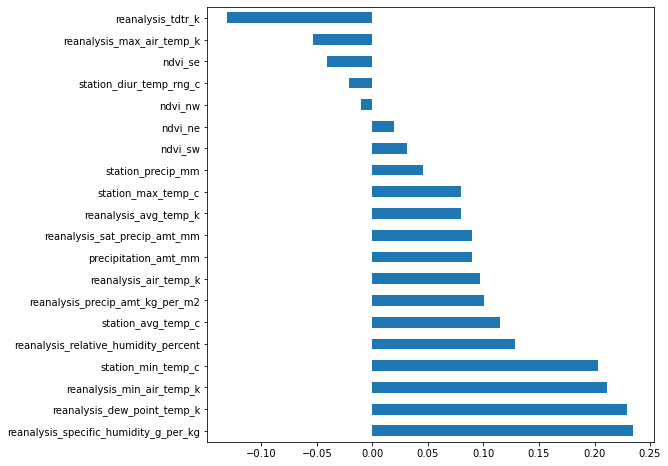

In [41]:
# Iquitos
(iq_correlations
     .total_cases
     .drop('total_cases') # don't compare with myself
     .sort_values(ascending=False)
     .plot
     .barh(figsize = (8,8)))

The wetter the better
1. reanalysis_dew_point_temp_k , reanalaysis_specific_humidity_g_per_kg are most strongly correlated with total cases

Hot and Heavy
2. station_min_temp, min_air_temp_k 

Though Precipitation is correlated with humidity, it is weakly correlated with total cases.
Conditional indepent of total cases given humidity?

<font color=red> Correlation here only measures linear dependence. Baseline focuses on linear wetness trend model <font>

Selected Features: 
<ul>
    <li>reanalysis_specific_humidity_g_per_kg</li>
    <li>reanalysis_dew_point_temp_k</li>
    <li>station_avg_temp_c</li>
    <li>station_min_temp_c</li>
</ul>

In [42]:
def preprocess_data(data_path, labels_path=None):
    # load data and set index to city, year, weekofyear
    df = pd.read_csv(data_path, index_col=[0, 1, 2])
    
    # select features we want
    features = ['reanalysis_specific_humidity_g_per_kg', 
                 'reanalysis_dew_point_temp_k', 
                 'station_avg_temp_c', 
                 'station_min_temp_c']
    df = df[features]
    
    # fill missing values
    df.fillna(method='ffill', inplace=True)

    # add labels to dataframe
    if labels_path:
        labels = pd.read_csv(labels_path, index_col=[0, 1, 2])
        df = df.join(labels)
    
    # separate san juan and iquitos
    sj = df.loc['sj']
    iq = df.loc['iq']
    
    return sj, iq

In [43]:
sj_train, iq_train = preprocess_data('./dengue_features_train.csv',
                                    labels_path="./dengue_labels_train.csv")

In [44]:
# keep first 3/4 as training, the rest as validation
sj_train_subtrain = sj_train.head(800)
sj_train_subtest = sj_train.tail(sj_train.shape[0] - 800)

iq_train_subtrain = iq_train.head(400)
iq_train_subtest = iq_train.tail(iq_train.shape[0] - 400)

In [45]:
from statsmodels.tools import eval_measures
import statsmodels.formula.api as smf

def get_best_model(train, test):
    # Step 1: specify the form of the model
    model_formula = "total_cases ~ 1 + " \
                    "reanalysis_specific_humidity_g_per_kg + " \
                    "reanalysis_dew_point_temp_k + " \
                    "station_min_temp_c + " \
                    "station_avg_temp_c"
    
    grid = 10 ** np.arange(-8, -3, dtype=np.float64)
                    
    best_alpha = []
    best_score = 1000
        
    # Step 2: Find the best hyper parameter, alpha
    for alpha in grid:
        model = smf.glm(formula=model_formula,
                        data=train,
                        family=sm.families.NegativeBinomial(alpha=alpha))

        results = model.fit()
        predictions = results.predict(test).astype(int)
        score = eval_measures.meanabs(predictions, test.total_cases)

        if score < best_score:
            best_alpha = alpha
            best_score = score

    print('best alpha = ', best_alpha)
    print('best score = ', best_score)
            
    # Step 3: refit on entire dataset
    full_dataset = pd.concat([train, test])
    model = smf.glm(formula=model_formula,
                    data=full_dataset,
                    family=sm.families.NegativeBinomial(alpha=best_alpha))

    fitted_model = model.fit()
    return fitted_model
    
sj_best_model = get_best_model(sj_train_subtrain, sj_train_subtest)
iq_best_model = get_best_model(iq_train_subtrain, iq_train_subtest)

best alpha =  1e-08
best score =  22.080882352941178
best alpha =  1e-08
best score =  6.466666666666667


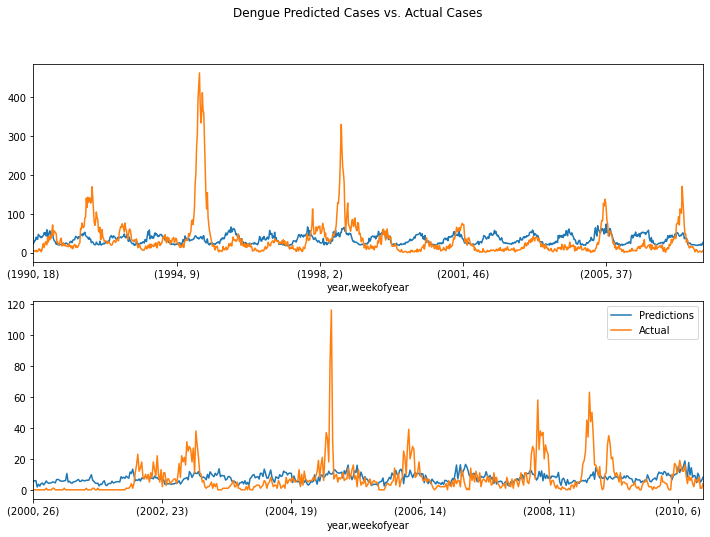

In [46]:
from warnings import filterwarnings
filterwarnings('ignore')
figs, axes = plt.subplots(nrows=2, ncols=1, figsize =(12,8))

# plot sj
sj_train['fitted'] = sj_best_model.fittedvalues
sj_train.fitted.plot(ax=axes[0], label="Predictions")
sj_train.total_cases.plot(ax=axes[0], label="Actual")

# plot iq
iq_train['fitted'] = iq_best_model.fittedvalues
iq_train.fitted.plot(ax=axes[1], label="Predictions")
iq_train.total_cases.plot(ax=axes[1], label="Actual")

plt.suptitle("Dengue Predicted Cases vs. Actual Cases")
plt.legend()

- Datetime conversion
- train validation split
- minmax scaling based on training data(simulate real world)
- sliding window to create lags(past sequence) and next value to predict
- build model